In [1]:
import pandas as pd
import numpy as np
import os
import re
import requests
import time
import bs4
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
#import lxml


In [2]:
def eventData(url):
    data = requests.get(url).text
    soup = bs4.BeautifulSoup(data, 'html.parser')
    stats = soup.find_all('script')[51].text.split('"entries": [')[1]
    #Regex to access session data
    pattern = r'"sessionStats": [\d\w\s\{\}.:",]+'

    teamStats = re.findall(pattern, stats)
    cleanStats = []
    for team in teamStats:
        pattern = r'"elims": ([0-9]+),'
        elims = re.findall(pattern, team)[0]
        pattern = r'"wins": ([0-9]+),'
        wins = re.findall(pattern, team)[0]
        pattern = r'"matches": ([0-9]+),'
        matches = re.findall(pattern, team)[0]
        pattern = r'"avgPoints": ([0-9.]+),'
        avgPoints = re.findall(pattern, team)[0]
        pattern = r'"avgPlace": ([0-9.]+),'
        avgPlace = re.findall(pattern, team)[0]
        pattern = r'"avgElims": ([0-9.]+),'
        avgElims = re.findall(pattern, team)[0]
        pattern = r'"kdRatio": ([0-9.]+),'
        kdRatio = re.findall(pattern, team)[0]
        cleanStats.append({'elims': elims, 'wins': wins, 'matches': matches, 'avgPoints': avgPoints, 'avgElims': avgElims, 'avgPlace': avgPlace, 'kdRatio': kdRatio})

    pattern = r'"pointsEarned": ([0-9]+),'
    points = re.findall(pattern, stats)
    pattern = r'"rank": ([0-9]+),'
    rank = re.findall(pattern, stats)

    df = pd.DataFrame(cleanStats)
    df['points'] = points
    df['rank'] = rank
    df = df.astype(float)

    #Finding Elimination/Placement Point Distribution Stats
    elimLine = soup.find_all('div', {'class': 'fne-scores__entry'})[-1].text
    pattern = r'\nEach Elimination\n\+ ([0-9]+)\n'
    elimVal = float(re.findall(pattern, elimLine)[0])
    df['elimPoints'] = df['elims'] * elimVal
    df['placementPoints'] = df['points'] - df['elimPoints']
    df['elimPtsProportion'] = df['elimPoints']/df['points']
    df['placementPtsProportion'] = df['placementPoints']/df['points']
    df['winrate'] = df['wins']/df['matches']
    return df

In [3]:
df = eventData('https://fortnitetracker.com/events/epicgames_S21_PgodCup_NAW?window=S21_PgodCup_NAW_Round1')
df

,elims,wins,matches,avgPoints,avgElims,avgPlace,kdRatio,points,rank,elimPoints,placementPoints,elimPtsProportion,placementPtsProportion,winrate
0,122.0,4.0,9.0,29.56,13.56,6.89,24.40,266.0,1.0,122.0,144.0,0.458647,0.541353,0.444444
1,104.0,4.0,7.0,35.71,14.86,2.57,34.67,250.0,2.0,104.0,146.0,0.416000,0.584000,0.571429
2,88.0,3.0,9.0,24.89,9.78,6.44,14.67,224.0,3.0,88.0,136.0,0.392857,0.607143,0.333333
3,124.0,1.0,10.0,22.30,12.40,12.70,13.78,223.0,4.0,124.0,99.0,0.556054,0.443946,0.100000
4,76.0,5.0,9.0,24.67,8.44,7.67,19.00,222.0,5.0,76.0,146.0,0.342342,0.657658,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,69.0,1.0,9.0,17.67,7.67,10.44,8.62,159.0,96.0,69.0,90.0,0.433962,0.566038,0.111111
96,82.0,1.0,10.0,15.80,8.20,13.10,9.11,158.0,97.0,82.0,76.0,0.518987,0.481013,0.100000
97,90.0,0.0,10.0,15.80,9.00,13.30,9.00,158.0,98.0,90.0,68.0,0.569620,0.430380,0.000000
98,79.0,0.0,10.0,15.80,7.90,11.20,7.90,158.0,99.0,79.0,79.0,0.500000,0.500000,0.000000


In [4]:
#Players on the Leaderboard on Esport Orgs
#players = soup.find_all('script')
#players = players[55].text
#pattern = r'"name": (.+),'
#re.findall(pattern, players)

In [5]:
df.sort_values(by='winrate', ascending = False)

,elims,wins,matches,avgPoints,avgElims,avgPlace,kdRatio,points,rank,elimPoints,placementPoints,elimPtsProportion,placementPtsProportion,winrate
81,86.0,3.0,4.0,40.25,21.50,7.50,86.00,161.0,82.0,86.0,75.0,0.534161,0.465839,0.750000
1,104.0,4.0,7.0,35.71,14.86,2.57,34.67,250.0,2.0,104.0,146.0,0.416000,0.584000,0.571429
4,76.0,5.0,9.0,24.67,8.44,7.67,19.00,222.0,5.0,76.0,146.0,0.342342,0.657658,0.555556
62,44.0,4.0,8.0,20.75,5.50,7.00,11.00,166.0,63.0,44.0,122.0,0.265060,0.734940,0.500000
0,122.0,4.0,9.0,29.56,13.56,6.89,24.40,266.0,1.0,122.0,144.0,0.458647,0.541353,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,60.0,0.0,10.0,16.10,6.00,10.10,6.00,161.0,90.0,60.0,101.0,0.372671,0.627329,0.000000
61,88.0,0.0,10.0,16.70,8.80,13.00,8.80,167.0,62.0,88.0,79.0,0.526946,0.473054,0.000000
97,90.0,0.0,10.0,15.80,9.00,13.30,9.00,158.0,98.0,90.0,68.0,0.569620,0.430380,0.000000
98,79.0,0.0,10.0,15.80,7.90,11.20,7.90,158.0,99.0,79.0,79.0,0.500000,0.500000,0.000000


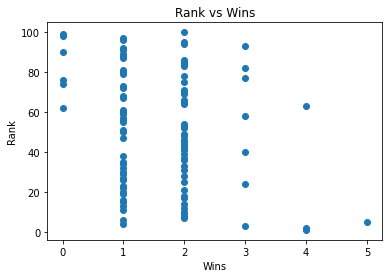

In [6]:
fig = plt.figure()
plt.scatter(df['wins'], df['rank'])
plt.title("Rank vs Wins")
plt.ylabel("Rank")
plt.xlabel('Wins')
plt.show()

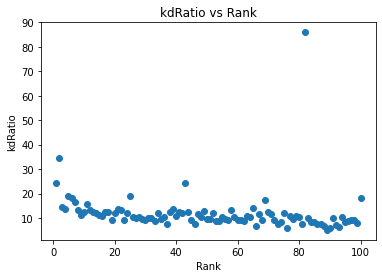

In [7]:
fig = plt.figure()
plt.scatter(df['rank'], df['kdRatio'])
plt.title("kdRatio vs Rank")
plt.ylabel("kdRatio")
plt.xlabel('Rank')
plt.show()

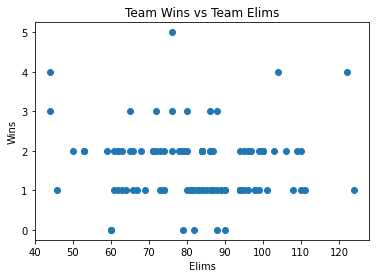

In [8]:
fig = plt.figure()
plt.scatter(df['elims'], df['wins'])
plt.title("Team Wins vs Team Elims")
plt.ylabel("Wins")
plt.xlabel('Elims')
plt.show()

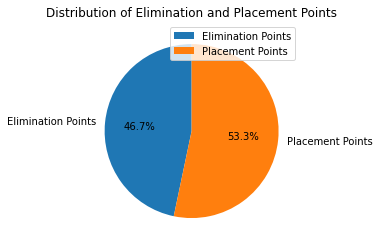

In [9]:
fig = plt.figure()
plt.pie([df['elimPoints'].sum(), df['placementPoints'].sum()], autopct='%1.1f%%', labels = ['Elimination Points', 'Placement Points'], startangle = 90)
plt.title('Distribution of Elimination and Placement Points')
plt.legend()
plt.show()

In [10]:
#Can build larger event datasets by simply inputting other event urls and merging the dataframes.
second_df = eventData('https://fortnitetracker.com/events/epicgames_S21_PgodCup_NAW?window=S21_PgodCup_NAW_Round1&page=1')
merged =  pd.concat([df, second_df], ignore_index=True)
merged

,elims,wins,matches,avgPoints,avgElims,avgPlace,kdRatio,points,rank,elimPoints,placementPoints,elimPtsProportion,placementPtsProportion,winrate
0,122.0,4.0,9.0,29.56,13.56,6.89,24.40,266.0,1.0,122.0,144.0,0.458647,0.541353,0.444444
1,104.0,4.0,7.0,35.71,14.86,2.57,34.67,250.0,2.0,104.0,146.0,0.416000,0.584000,0.571429
2,88.0,3.0,9.0,24.89,9.78,6.44,14.67,224.0,3.0,88.0,136.0,0.392857,0.607143,0.333333
3,124.0,1.0,10.0,22.30,12.40,12.70,13.78,223.0,4.0,124.0,99.0,0.556054,0.443946,0.100000
4,76.0,5.0,9.0,24.67,8.44,7.67,19.00,222.0,5.0,76.0,146.0,0.342342,0.657658,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,41.0,0.0,9.0,16.44,4.56,7.67,4.56,148.0,196.0,41.0,107.0,0.277027,0.722973,0.000000
196,61.0,3.0,9.0,16.33,6.78,12.33,10.17,147.0,197.0,61.0,86.0,0.414966,0.585034,0.333333
197,70.0,2.0,5.0,29.40,14.00,8.00,23.33,147.0,198.0,70.0,77.0,0.476190,0.523810,0.400000
198,50.0,2.0,8.0,18.38,6.25,8.88,8.33,147.0,199.0,50.0,97.0,0.340136,0.659864,0.250000


In [28]:
#This function automates the process using a simple for loop. By entering the original event url and inputting the amount of pages of data (100 entries per page), a single dataframe with the specified amount of pages of data will be returned.
def getEventData(url, pages):
    df = eventData(url)
    for i in range(pages - 1):
        page_url = url + '&page={}'.format(i+1)
        page_df = eventData(page_url)
        df = pd.concat([df, page_df], ignore_index = True)
    return df

In [29]:
big_df = getEventData('https://fortnitetracker.com/events/epicgames_S21_PgodCup_NAW?window=S21_PgodCup_NAW_Round1', 10)
big_df

,elims,wins,matches,avgPoints,avgElims,avgPlace,kdRatio,points,rank,elimPoints,placementPoints,elimPtsProportion,placementPtsProportion,winrate
0,122.0,4.0,9.0,29.56,13.56,6.89,24.40,266.0,1.0,122.0,144.0,0.458647,0.541353,0.444444
1,104.0,4.0,7.0,35.71,14.86,2.57,34.67,250.0,2.0,104.0,146.0,0.416000,0.584000,0.571429
2,88.0,3.0,9.0,24.89,9.78,6.44,14.67,224.0,3.0,88.0,136.0,0.392857,0.607143,0.333333
3,124.0,1.0,10.0,22.30,12.40,12.70,13.78,223.0,4.0,124.0,99.0,0.556054,0.443946,0.100000
4,76.0,5.0,9.0,24.67,8.44,7.67,19.00,222.0,5.0,76.0,146.0,0.342342,0.657658,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34.0,0.0,10.0,10.60,3.40,14.80,3.40,106.0,996.0,34.0,72.0,0.320755,0.679245,0.000000
996,33.0,0.0,10.0,10.60,3.30,12.30,3.30,106.0,997.0,33.0,73.0,0.311321,0.688679,0.000000
997,30.0,0.0,10.0,10.60,3.00,14.10,3.00,106.0,998.0,30.0,76.0,0.283019,0.716981,0.000000
998,24.0,0.0,10.0,10.60,2.40,12.10,2.40,106.0,999.0,24.0,82.0,0.226415,0.773585,0.000000


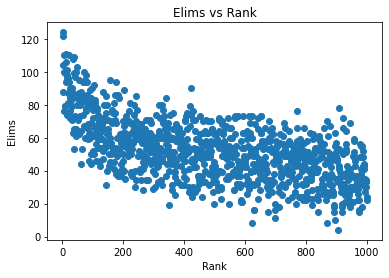

In [30]:
fig = plt.figure()
plt.scatter(big_df['rank'], big_df['elims'])
plt.title("Elims vs Rank")
plt.ylabel("Elims")
plt.xlabel('Rank')
plt.show()

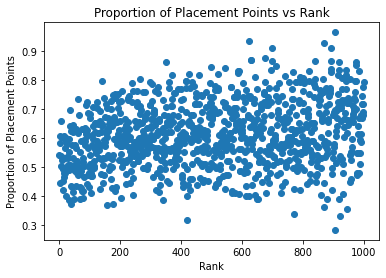

In [31]:
fig = plt.figure()
plt.scatter(big_df['rank'], big_df['placementPtsProportion'])
plt.title("Proportion of Placement Points vs Rank")
plt.ylabel("Proportion of Placement Points")
plt.xlabel('Rank')
plt.show()

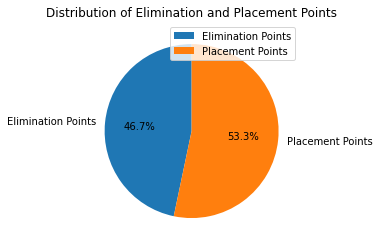

In [32]:
fig = plt.figure()
plt.pie([df['elimPoints'].sum(), df['placementPoints'].sum()], autopct='%1.1f%%', labels = ['Elimination Points', 'Placement Points'], startangle = 90)
plt.title('Distribution of Elimination and Placement Points')
plt.legend()
plt.show()

In [33]:
big_df['wins'].value_counts().sort_index()

0.0    339
1.0    487
2.0    154
3.0     16
4.0      3
5.0      1
Name: wins, dtype: int64

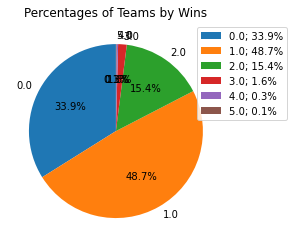

In [34]:
fig = plt.figure()
plt.pie(big_df['wins'].value_counts().sort_index().values, autopct='%1.1f%%', labels = big_df['wins'].value_counts().sort_index().index, startangle = 90)
plt.title('Percentages of Teams by Wins')
plt.legend()
labels = [f'{l}; {s/10:0.1f}%' for l, s in zip(big_df['wins'].value_counts().sort_index().index, big_df['wins'].value_counts().sort_index().values)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.show()